<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 2</h2></center>

<center><h3>Grading Table</h3></center>

|             | Part 1 | Part 2      | General Otline      | Total |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| **Points**      | 60          | 30     | 10                  | 100   |

In [209]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [210]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [211]:
with open("dataset.pkl", "rb") as file:
    points = pickle.load(file)

points[0]

((-0.6034323015798435,
  0.35078723996566435,
  0.8352988265292909,
  -0.7098583457975749,
  1.0693175756002515),
 6.981904457939088)

# Part 1

* In this part, you will work with a hypothetical dataset generated by us. The aim is to find the true weights of the input variables that were used to generate this dataset. 
* You are given a dataset of length 100.000 that consists of 5 features (X) and target (y). For each data point, X is a tuple with 5 features (x1, x2, x3, x4, x5) and y is the target variable.
* Write your custom gradient descent algorithm to find the weights. Note that you might want to consider polynomial features too. It is guaranteed that none of the input features are above 2nd degree, so it is enough to only check for the 2nd degree. 
* After you think that you reached a solution, print the rounded version of the weights so that they only have 1 digit after the comma.
* You can use the refer to below structure while writing your code (You can cuse your own structure too).
* Plot the loss values after each iteration at the end.

In [212]:
x = [x for x, y in points]
x = np.array(x)
y = [y for x, y in points]
y =  np.array(y)
x

array([[-0.6034323 ,  0.35078724,  0.83529883, -0.70985835,  1.06931758],
       [ 1.13547137,  0.31547149,  0.44159231, -1.59361675,  2.14836009],
       [ 1.78349447,  0.3586637 , -1.40867483,  0.58643836, -0.22743179],
       ...,
       [ 0.95771955, -0.8694959 ,  0.34269476, -0.85351646,  0.44043666],
       [-1.0188104 ,  1.07932348, -0.34644776, -0.80193096,  1.68350641],
       [-0.33986398,  1.20879746,  0.74418562, -0.64829915, -0.11826947]])

In [213]:
A = np.ones(x.shape[0])
A

array([1., 1., 1., ..., 1., 1., 1.])

In [214]:
padded_x = np.c_[A, x]
padded_x

array([[ 1.        , -0.6034323 ,  0.35078724,  0.83529883, -0.70985835,
         1.06931758],
       [ 1.        ,  1.13547137,  0.31547149,  0.44159231, -1.59361675,
         2.14836009],
       [ 1.        ,  1.78349447,  0.3586637 , -1.40867483,  0.58643836,
        -0.22743179],
       ...,
       [ 1.        ,  0.95771955, -0.8694959 ,  0.34269476, -0.85351646,
         0.44043666],
       [ 1.        , -1.0188104 ,  1.07932348, -0.34644776, -0.80193096,
         1.68350641],
       [ 1.        , -0.33986398,  1.20879746,  0.74418562, -0.64829915,
        -0.11826947]])

In [215]:
def loss(w):
    # Our solution is 1 line of code, but don't worry if you deviate
    return sum((np.dot(padded_x, w) - y)**2)

def stochastic_dF(w, i):
    # Our solution is 2 lines of code, but don't worry if you deviate
    return 2 * (np.dot(padded_x[i], w) - y[i])*padded_x[i]
    

def stochastic_gradient_descent(loss, stochastic_dF, d, n):
    # Our solution is 7 lines of code, but don't worry if you deviate
    #w = np.random.randn(d)
    w = np.zeros(d)
    eta = 0.001
    for epoch in range(100):
        for j in range(n):
            i = np.random.randint(0, n)
            w -= eta * stochastic_dF(w, i)
            if j % 100 == 0:
                eta /= 1.02
        current_loss = loss(w)
        print(f"w: {np.round(w, 2)}, loss: {current_loss}")
        

            

stochastic_gradient_descent(loss, stochastic_dF, 6, len(points))

w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.7093673502
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284
w: [ 2.63  0.26  2.3  -0.44 -3.07  3.3 ], loss: 563159.709337284


KeyboardInterrupt: 

In [216]:
poly_x = np.c_[padded_x, x ** 2]
poly_x.shape

(100000, 11)

In [217]:
def loss(w):
    # Our solution is 1 line of code, but don't worry if you deviate
    return sum((np.dot(poly_x, w) - y)**2)

def stochastic_dF(w, i):
    # Our solution is 2 lines of code, but don't worry if you deviate
    return 2 * (np.dot(poly_x[i], w) - y[i])*poly_x[i]

def polynomial_sgd(loss, stochastic_dF, d, n):
    w = np.zeros(d)
    eta = 0.001
    for epoch in range(100):
        for j in range(n):
            i = np.random.randint(0, n)
            w -= eta * stochastic_dF(w, i)
            if j % 100 == 0:
                eta /= 1.02
        current_loss = loss(w)
        print(f"w: {np.round(w, 2)}, loss: {current_loss}")

polynomial_sgd(loss, stochastic_dF, 11, len(points))

w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440597891
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311
w: [ 1.03  0.32  2.31 -0.39 -3.09  3.3   1.55  0.01  0.02  0.01  0.02], loss: 100763.49440322311


KeyboardInterrupt: 

# Part 2

In this section, you are going to use the dataset given below, and predict the risk of heart attack. <br>
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

### Step 1

Split the data into training and test so that you have X_training, X_test, y_training, y_test.

In [218]:
df = pd.read_csv('heart.csv')
y = df['target']
X = df
X.drop(["target"], axis = 1, inplace = True)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [219]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [220]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [221]:
print(X_training.shape)
print(X_test.shape)
print(y_training.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### Step 2

Inspect the data and comment if logistic regression is a good fit to apply.

It can be seen that our target is either 0 or 1 so this is a binary classification problem. Therefore logistic regression is a good fit to apply.

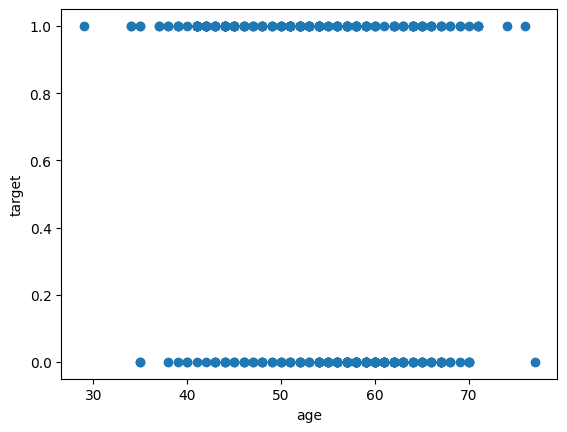

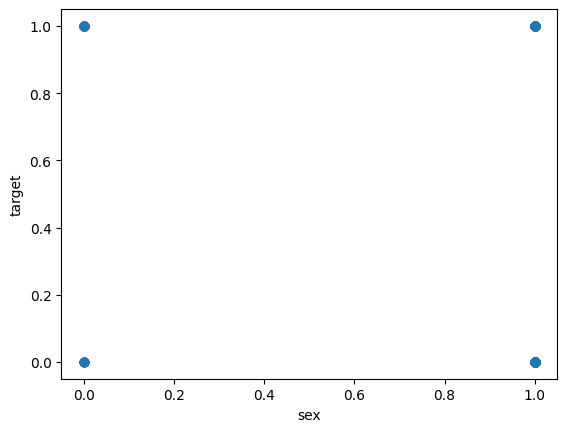

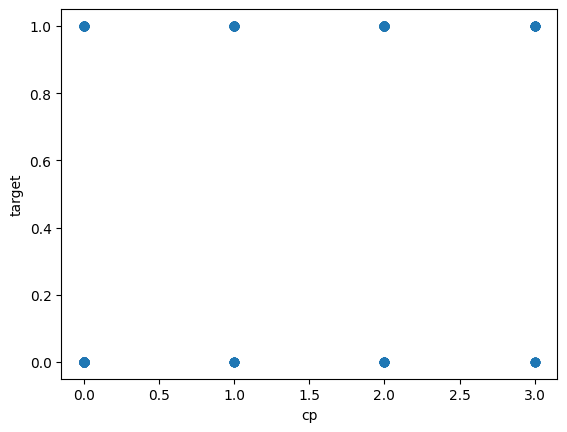

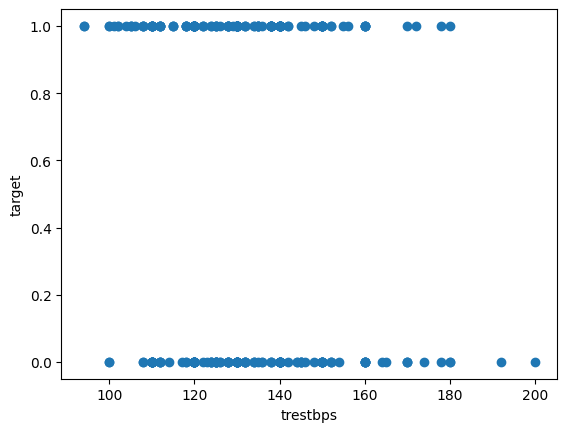

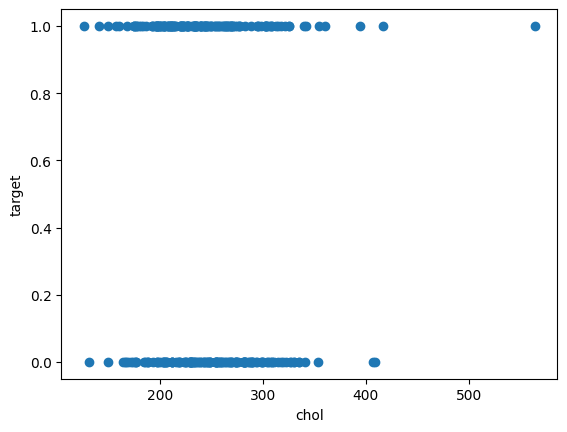

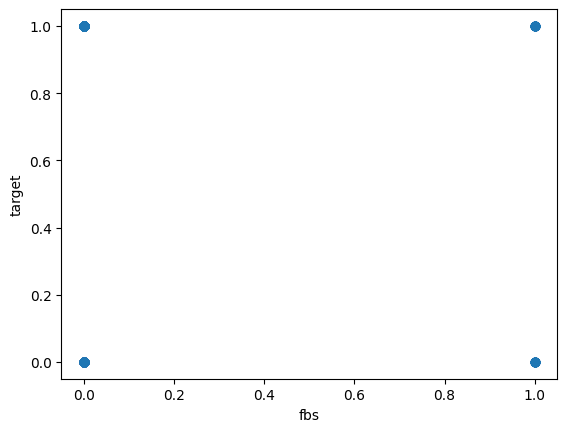

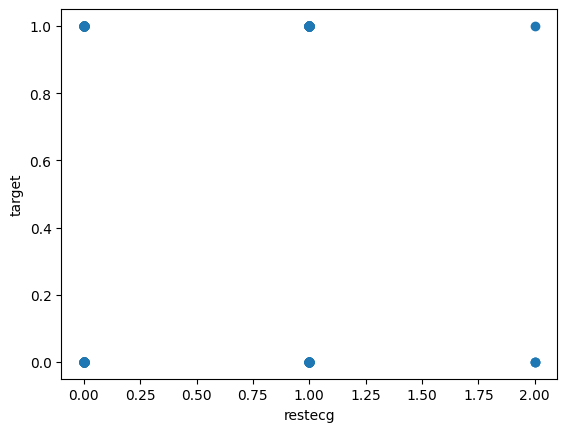

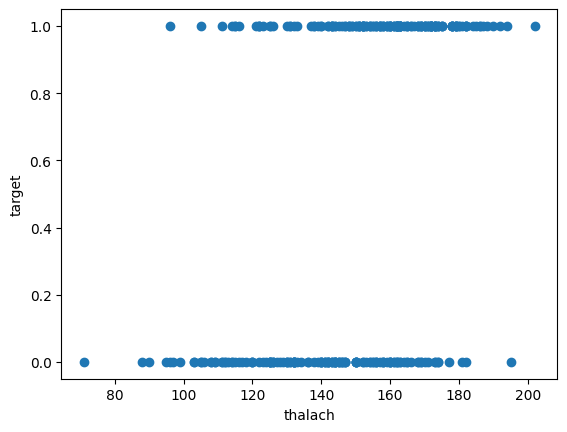

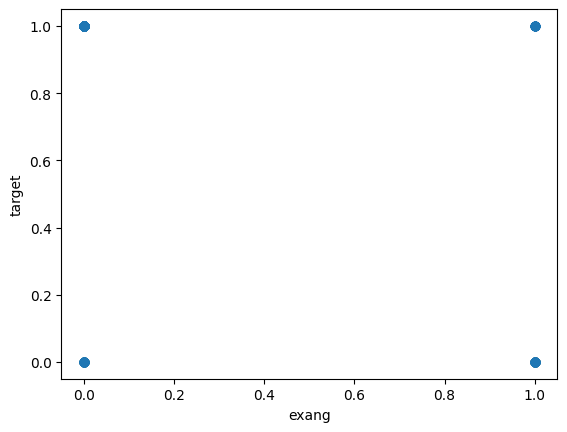

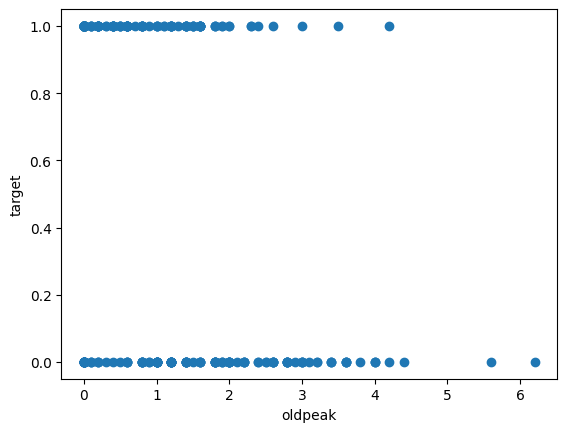

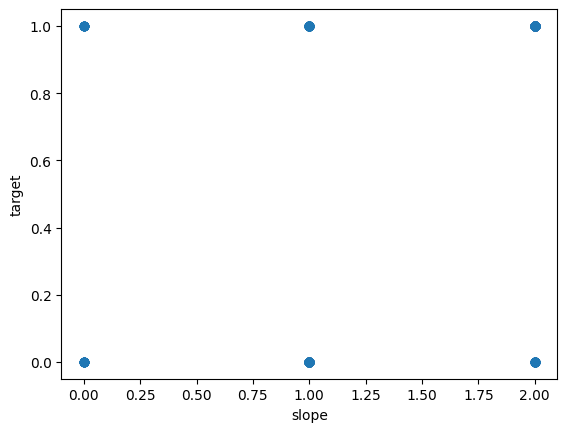

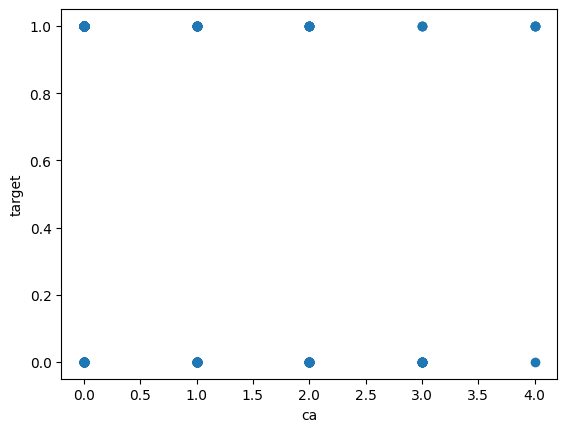

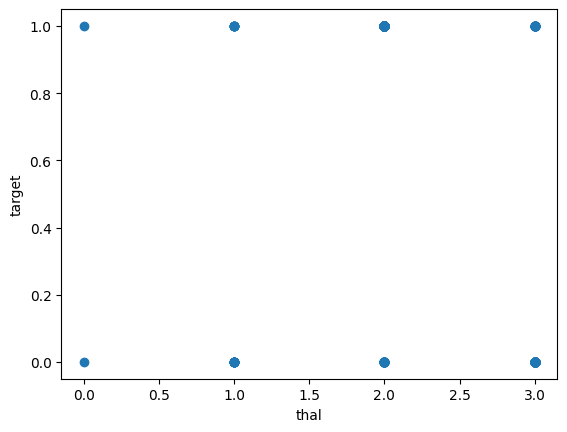

In [223]:
for feature in X:
    plt.scatter(df[feature], y)
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()

### Step 3

Standardize x with respect to x_train.

In [224]:
scaler = preprocessing.StandardScaler().fit(X_training)
X_training_scaled = scaler.transform(X_training)
X_test_scaled = scaler.transform(X_test)

### Step 4

Apply logistic regression (you can use scikitlearn).

In [225]:
regression = linear_model.LogisticRegression().fit(X_training_scaled, y_training)

In [247]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def binary_cross_entropy(X_test_scaled, w, y_test):
#     return -1 * (y_test.dot(np.log(sigmoid(w.dot(X_test_scaled.T)))) + (1 - y_test).dot(np.log(1 - sigmoid(w.dot(X_test_scaled.T))))).mean()

# def logistic_stochastic_dF(w, i):
#     # Our solution is 2 lines of code, but don't worry if you deviate
#     return X_training_scaled.T.dot(sigmoid(w.dot(X.T)) - y_training)

# def logistic_polynomial_sgd(binary_cross_entropy, logistic_stochastic_dF, d, n):
#     w = np.zeros(d)
#     eta = 0.001
#     for epoch in range(100):
#         for j in range(n):
#             i = np.random.randint(0, n)
#             w -= eta * logistic_stochastic_dF(w, i)
#             if j % 100 == 0:
#                 eta /= 1.02
#         current_loss = binary_cross_entropy(X_test_scaled, w, y_test)
#         print(f"w: {np.round(w, 2)}, loss: {current_loss}")

# logistic_polynomial_sgd(binary_cross_entropy,logistic_stochastic_dF, 14, X_training_scaled.shape[0])

ValueError: shapes (14,) and (13,303) not aligned: 14 (dim 0) != 13 (dim 0)

### Step 5

Evaluate the accuracy.

In [226]:
regression.score(X_test_scaled, y_test)

0.8524590163934426